In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Resultados Primer Medicion

In [2]:
PATH = "./measurements/full-x4"

In [3]:
fechas=['2021-11-03_17-49-11','2021-11-05_16-07-41','2021-11-05_18-09-50','2021-11-08_15-57-42','2021-11-08_18-00-42']
data=[]

for i in fechas:
    data.append(pd.read_csv(f"{PATH}/{i}/figuras/area_{i}.csv"))

In [4]:
data=pd.concat(data)

In [5]:
len(data['Area1'])

26

In [6]:
#OBSERVACIONES EN EL TIEMPO: x, por el eje. ESTO PARA LA MEDICIÓN ANTERIOR, NO BORRAR

#1/4 porque son 4 mediciones en un día, así queda en función de los días
dt=1/4

x= np.arange(0,len(data['Area1'])/4,1/4)

In [7]:
#AREAS
area1=[]
area2=[]
area3=[]
area4=[]

for i in range(len(fechas)):
    area1.append(np.array(data['Area1']))
    area2.append(np.array(data['Area2']))
    area3.append(np.array(data['Area3']))
    area4.append(np.array(data['Area4']))

area1=np.concatenate(area1)
area2=np.concatenate(area2)
area3=np.concatenate(area3)
area4=np.concatenate(area4)

In [8]:
#op2
c1=np.array([data['Area1']])/(25*60)
c2=np.array([data['Area2']])/(25*60)
c3=np.array([data['Area3']])/(25*60)
c4=np.array([data['Area4']])/(25*60)

In [9]:
area1

array([ 831631. ,  974841. ,  790587.5,  284659. , 1157460.5, 1144820. ,
       1267513.5,  677947.5,  988622. , 1026005.5, 1006854.5, 1093228.5,
       2338944. , 1885632.5, 1497286. , 1230042. ,  938509.5,  807984. ,
        699564. , 2250000. , 1651300.5, 2301928. , 1620841. , 1332368.5,
       1418490. , 1294032.5,  831631. ,  974841. ,  790587.5,  284659. ,
       1157460.5, 1144820. , 1267513.5,  677947.5,  988622. , 1026005.5,
       1006854.5, 1093228.5, 2338944. , 1885632.5, 1497286. , 1230042. ,
        938509.5,  807984. ,  699564. , 2250000. , 1651300.5, 2301928. ,
       1620841. , 1332368.5, 1418490. , 1294032.5,  831631. ,  974841. ,
        790587.5,  284659. , 1157460.5, 1144820. , 1267513.5,  677947.5,
        988622. , 1026005.5, 1006854.5, 1093228.5, 2338944. , 1885632.5,
       1497286. , 1230042. ,  938509.5,  807984. ,  699564. , 2250000. ,
       1651300.5, 2301928. , 1620841. , 1332368.5, 1418490. , 1294032.5,
        831631. ,  974841. ,  790587.5,  284659. , 

La fórmula es 
g= $\frac{F CT 44 g/mol}{22414 . 10^6 0.001L/mol}$

Con F el flujo (1.5L/min), CT el área bajo la curva en MINUTOS, como lo tenemos en segundos:

g= $\frac{F* CT/60 * 44 g/mol}{22414 . 10^6 0.001L/mol}$

In [10]:
F = 1.5
den = 22414 * 0.001 * 10 ** 6

def gramos(x): #meter el área
    return F * x *6*60*44 / (den)


In [11]:
gramos1=gramos(c1)
gramos2=gramos(c2)
gramos3=gramos(c3)
gramos4=gramos(c4)

In [12]:
#Gramos acumulados, suponiendo que ese valor se produjo durante 6h
gramos1_ac=np.add.accumulate(gramos1[0])
gramos2_ac=np.add.accumulate(gramos2[0])
gramos3_ac=np.add.accumulate(gramos3[0])
gramos4_ac=np.add.accumulate(gramos4[0])

In [13]:
def error(x): #INTRODUCIR LA CONCENTRACIÓN
    sigma_F=0.1
    sigma_A=50 + x*0.05
    A=sigma_F*x*6*60*44/den
    B=sigma_A*F*6*60*44/den
    return (A**2 + B**2)

In [14]:
error_g1=error(c1[0]) #var
error_g2=error(c2[0]) #var
error_g3=error(c3[0]) #var
error_g4=error(c4[0]) #var

In [15]:
error_g1_ac=np.add.accumulate(error_g1)
error_g2_ac=np.add.accumulate(error_g2)
error_g3_ac=np.add.accumulate(error_g3)
error_g4_ac=np.add.accumulate(error_g4)

Cada área tomada fue de 25 minutos, por tanto, hacemos regla de 3 simples para comparar con el de titulacion (5.5h)

25 min ---- area

5.5h=330min ----

se debe multiplicar al eje Y por 330/25=13.2 ¿¿¿???

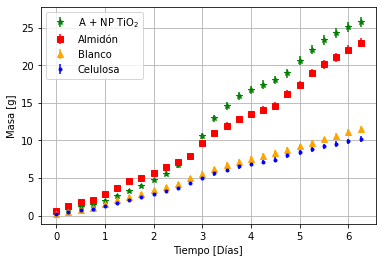

In [16]:
#plt.title('CO2 acumulado - sensor')
plt.errorbar(x,gramos3_ac,yerr=error_g3_ac**0.5,fmt='*',label='A + NP TiO$_2$',color='green')
plt.errorbar(x,gramos1_ac,yerr=error_g1_ac**0.5,fmt='s',label='Almidón',color='red')
plt.errorbar(x,gramos4_ac,yerr=error_g4_ac**0.5,fmt='^',label='Blanco',color='orange')
plt.errorbar(x,gramos2_ac,yerr=error_g2_ac**0.5,fmt='.',label='Celulosa',color='blue')
plt.legend()
plt.xlabel('Tiempo [Días]')
plt.ylabel('Masa [g]')
plt.grid(True)
plt.savefig("co2_acumulado-sensor_primer-medicion.png")
plt.show()

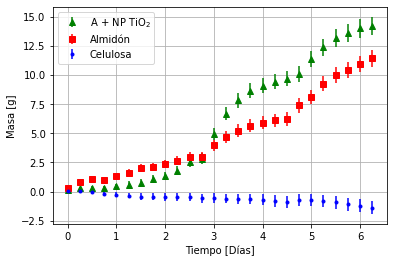

In [17]:
#plt.title('CO2 acumulado - sensor- restado')
plt.errorbar(x,gramos3_ac-gramos4_ac,yerr=(error_g3_ac+error_g4_ac)**0.5,fmt='^',label='A + NP TiO$_2$',color='green')
plt.errorbar(x,gramos1_ac-gramos4_ac,yerr=(error_g1_ac+error_g4_ac)**0.5,fmt='s',label='Almidón',color='red')
plt.errorbar(x,gramos2_ac-gramos4_ac,yerr=(error_g2_ac+error_g4_ac)**0.5,fmt='.',label='Celulosa',color='blue')
plt.legend()
plt.xlabel('Tiempo [Días]')
plt.ylabel('Masa [g]')
plt.grid(True)
plt.savefig("co2_acumulado-sensor_primer-medicion-restado.png")
plt.show()

# Resultados Segunda Medicion

In [18]:
fechas=['2021-11-19_17-55-37','2021-11-27_16-16-53']
data=[]

for i in fechas:
    data.append(pd.read_csv(f"{PATH}/{i}/figuras/area_{i}.csv"))
    
data.append(pd.read_csv(f"{PATH}/areasfinales/areas_0-280.csv"))
data.append(pd.read_csv(f"{PATH}/areasfinales/areas_280-525.csv"))
data.append(pd.read_csv(f"{PATH}/areasfinales/areas_525-569.csv"))
data.append(pd.read_csv(f"{PATH}/areasfinales/areas_570-663.csv"))

#REPITO LOS ÚLTIMOS 4 PUNTOS PARA LLENAR EL BACHE. CORRESPONDE A LOS LUGARES 50,51,52,53
data.append(pd.read_csv(f"{PATH}/areasfinales/areas_525-569.csv"))
data.append(pd.read_csv(f"{PATH}/areasfinales/areas_570-663.csv"))

data.append(pd.read_csv(f"{PATH}/areasfinales/areas_955-990.csv"))
data.append(pd.read_csv(f"{PATH}/areasfinales/areas_991-1134.csv"))
data.append(pd.read_csv(f"{PATH}/areasfinales/areas_1180-1200.csv"))
data.append(pd.read_csv(f"{PATH}/areasfinales/areas_1222-1237.csv"))

In [19]:
data=pd.concat(data)

In [20]:
dt=1/4

long=39

x1= np.arange(0,long/4,dt)
x2=(np.array([1,2,3,4,5,6,7,8,9,10,11,12+4,13+4,14+4,15+4,16+4,17+4,18+4]) + long)/4 #,8,9,10,11, 16,17,18,19,20,21,22,23,24])+long)/4
x3=(np.arange(1,23,1)+long)/4

x_2=np.concatenate([x1,x2])

In [21]:
#LA CONCENTRACION EN 25MIN:

#area1=np.array([data['Area1']])/60
#area2=np.array([data['Area2']])/60
#area3=np.array([data['Area3']])/60
#area4=np.array([data['Area4']])/60

c1=np.array([data['Area1']])/(25*60)
c2=np.array([data['Area2']])/(25*60)
c3=np.array([data['Area3']])/(25*60)
c4=np.array([data['Area4']])/(25*60)

In [22]:
F = 1.5
den = 22414 * 0.001 * 10 ** 6

def gramos(C): #meter el área
    return F *C*6*60* 44 / (den)

#Se le introduce la CONCENTRACIÓN
#Se proyecta que eso emite durante 6h, pero como tiene que estar en minutos, se multiplica por 6*60

In [23]:
gramos1=gramos(c1)#area1))#*14.4
gramos2=gramos(c2)#area2))#*14.4
gramos3=gramos(c3)#area3))#*14.4
gramos4=gramos(c4)#area4))#*14.4

In [24]:
#Gramos acumulados, suponiendo que ese valor se produjo durante 6h
gramos1_ac_2=np.add.accumulate(gramos1[0])
gramos2_ac_2=np.add.accumulate(gramos2[0])
gramos3_ac_2=np.add.accumulate(gramos3[0])
gramos4_ac_2=np.add.accumulate(gramos4[0])

In [25]:
gramos1_ac_2[49:55]

array([39.12845718, 39.75388771, 40.82524598, 41.45200758, 41.96230943,
       42.48173479])

In [26]:
#ELIMINO LOS 4 PUNTOS DEL BACHE, QUE NO SON REALES
gramos1_ac_2[50],gramos1_ac_2[51],gramos1_ac_2[52],gramos1_ac_2[53]

(39.75388771303649, 40.82524597840635, 41.45200758454537, 41.96230943160524)

In [27]:
gramos1_ac_2=np.delete(gramos1_ac_2,[50,51,52,53])
gramos2_ac_2=np.delete(gramos2_ac_2,[50,51,52,53])
gramos3_ac_2=np.delete(gramos3_ac_2,[50,51,52,53])
gramos4_ac_2=np.delete(gramos4_ac_2,[50,51,52,53])

In [28]:
def error(x): #INTRODUCIR LA CONCENTRACIÓN
    sigma_F=0.1
    sigma_A=50 + x*0.05
    A=sigma_F*x*6*60*44/den
    B=sigma_A*F*6*60*44/den
    return (A**2 + B**2)

In [29]:
error_g1_2=error(c1[0]) #var
error_g2_2=error(c2[0]) #var
error_g3_2=error(c3[0]) #var
error_g4_2=error(c4[0]) #var

In [30]:
error_g1_ac_2=np.add.accumulate(error_g1_2)
error_g2_ac_2=np.add.accumulate(error_g2_2)
error_g3_ac_2=np.add.accumulate(error_g3_2)
error_g4_ac_2=np.add.accumulate(error_g4_2)

In [31]:
error_g1_ac_2=np.delete(error_g1_ac_2,[50,51,52,53])
error_g2_ac_2=np.delete(error_g2_ac_2,[50,51,52,53])
error_g3_ac_2=np.delete(error_g3_ac_2,[50,51,52,53])
error_g4_ac_2=np.delete(error_g4_ac_2,[50,51,52,53])

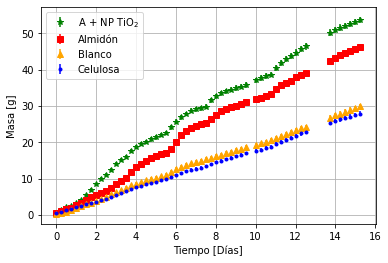

In [32]:
#plt.title('CO2 acumulado - sensor')
plt.errorbar(x_2,gramos3_ac_2,yerr=error_g3_ac_2**0.5,fmt='*',label='A + NP TiO$_2$',color='green')
plt.errorbar(x_2,gramos1_ac_2,yerr=error_g1_ac_2**0.5,fmt='s',label='Almidón',color='red')
plt.errorbar(x_2,gramos4_ac_2,yerr=error_g4_ac_2**0.5,fmt='^',label='Blanco',color='orange')
plt.errorbar(x_2,gramos2_ac_2,yerr=error_g2_ac_2**0.5,fmt='.',label='Celulosa',color='blue')
plt.legend()
plt.xlabel('Tiempo [Días]')
plt.ylabel('Masa [g]')
plt.grid(True)
plt.savefig("co2_acumulado-sensor_segunda-medicion.png")
plt.show()

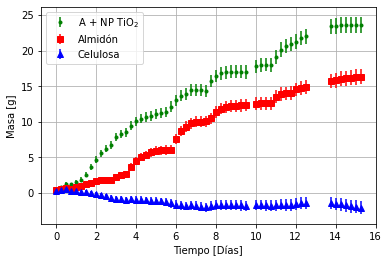

In [33]:
#plt.title('CO2 acumulado - sensor- restado')
plt.errorbar(x_2,gramos3_ac_2-gramos4_ac_2,yerr=(error_g3_ac_2+error_g4_ac_2)**0.5,fmt='.',label='A + NP TiO$_2$',color='green')
plt.errorbar(x_2,gramos1_ac_2-gramos4_ac_2,yerr=(error_g1_ac_2+error_g4_ac_2)**0.5,fmt='s',label='Almidón',color='red')
plt.errorbar(x_2,gramos2_ac_2-gramos4_ac_2,yerr=(error_g2_ac_2+error_g4_ac_2)**0.5,fmt='^',label='Celulosa',color='blue')
plt.legend()
plt.xlabel('Tiempo [Días]')
plt.ylabel('Masa [g]')
plt.grid(True)
plt.savefig("co2_acumulado-sensor_segunda-medicion-restado.png")
plt.show()

In [34]:
(gramos3_ac_2-gramos4_ac_2)[-1]

23.625244101008306

# Comparacion

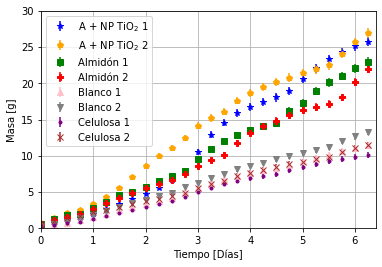

In [35]:
#plt.title('CO2 acumulado - sensor')
plt.errorbar(x,gramos3_ac,yerr=error_g3_ac**0.5,fmt='*',label='A + NP TiO$_2$ 1',color='blue')
plt.errorbar(x_2,gramos3_ac_2,yerr=error_g3_ac_2**0.5,fmt='p',label='A + NP TiO$_2$ 2',color='orange')
plt.errorbar(x,gramos1_ac,yerr=error_g1_ac**0.5,fmt='s',label='Almidón 1',color='green')
plt.errorbar(x_2,gramos1_ac_2,yerr=error_g1_ac_2**0.5,fmt='P',label='Almidón 2',color='red')
plt.errorbar(x,gramos4_ac,yerr=error_g4_ac**0.5,fmt='^',label='Blanco 1',color='pink')
plt.errorbar(x_2,gramos4_ac_2,yerr=error_g4_ac_2**0.5,fmt='v',label='Blanco 2',color='gray')
plt.errorbar(x,gramos2_ac,yerr=error_g2_ac**0.5,fmt='.',label='Celulosa 1',color='purple')
plt.errorbar(x_2,gramos2_ac_2,yerr=error_g2_ac_2**0.5,fmt='x',label='Celulosa 2',color='brown')
plt.legend()
plt.xlabel('Tiempo [Días]')
plt.ylabel('Masa [g]')
plt.xlim([0,6.4])
plt.ylim([0, 30])
plt.grid(True)
plt.savefig("co2_acumulado-sensor_juntos.png")
plt.show()

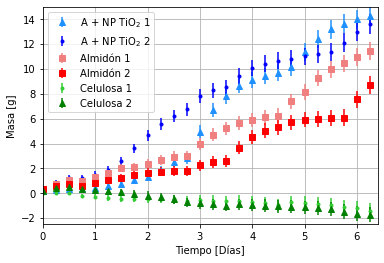

In [40]:
#plt.title('CO2 acumulado - sensor- restado')
plt.errorbar(x,gramos3_ac-gramos4_ac,yerr=(error_g3_ac+error_g4_ac)**0.5,fmt='^',label='A + NP TiO$_2$ 1',color='dodgerblue')
plt.errorbar(x_2,gramos3_ac_2-gramos4_ac_2,yerr=(error_g3_ac_2+error_g4_ac_2)**0.5,fmt='.',label='A + NP TiO$_2$ 2',color='blue')
plt.errorbar(x,gramos1_ac-gramos4_ac,yerr=(error_g1_ac+error_g4_ac)**0.5,fmt='s',label='Almidón 1',color='lightcoral')
plt.errorbar(x_2,gramos1_ac_2-gramos4_ac_2,yerr=(error_g1_ac_2+error_g4_ac_2)**0.5,fmt='s',label='Almidón 2',color='red')
plt.errorbar(x,gramos2_ac-gramos4_ac,yerr=(error_g2_ac+error_g4_ac)**0.5,fmt='.',label='Celulosa 1',color='limegreen')
plt.errorbar(x_2,gramos2_ac_2-gramos4_ac_2,yerr=(error_g2_ac_2+error_g4_ac_2)**0.5,fmt='^',label='Celulosa 2',color='green')
plt.legend()
plt.xlabel('Tiempo [Días]')
plt.ylabel('Masa [g]')
plt.xlim([0,6.4])
plt.ylim([-2.5, 15])
plt.grid(True)
plt.savefig("co2_acumulado-sensor_juntos-restado.png")
plt.show()